# Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

# Import Data

In [9]:
path = "Housing.csv"

In [10]:
housing = pd.read_csv(path)

# Created Fuctions
The Functions that have been created are:

`residual_plots_analysis` function
- plots a residual plot (residuals and predictions)
- plots a Normal QQ Plot

`cross_valid_model` function
- cross validates a linear regression model

`categoroy_value_counter` function
- plots barplots for value counts of unique values for non-numeric columns

In [11]:
def residual_plots_analysis(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    import seaborn as sns

    residuals = model.resid
    predictions = model.predict()

    fig, ax = plt.subplots(1, 2, sharey="all", figsize=((30/2.54), (20/2.54)))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residuals Plot")
    ax[0].set_ylabel("Predictions")
    ax[0].set_xlabel("Residuals")

    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Residuals Q-Q Plot")

In [12]:
def cross_validate_model(X, y):

    import statsmodels.api as sm
    from sklearn.model_selection import KFold
    from sklearn.metrics import r2_score as r2
    from sklearn.metrics import mean_absolute_error as mae
    import seaborn as sns

    kf = KFold(n_splits=5, shuffle=True, random_state=2024)

    cv_mae = []
    cv_r2s = []

    for train_ind, valid_ind in kf.split(X, y):
        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_valid, y_valid = X.iloc[valid_ind], y.iloc[valid_ind]

        model = sm.OLS(y_train, X_train).fit()

        cv_r2s.append(r2(y_valid, model.predict(X_valid)))
        cv_mae.append(mae(np.exp(y_valid), np.exp(model.predict(X_valid))))

    print("All Valid R2s:", [round(x, 3) for x in cv_r2s] )
    print(f"Cross Valid R2: {round(np.mean(cv_r2s),3)} +/- {round(np.std(cv_r2s),3)}")

    print("All Valid MAE:", [round(x, 3) for x in cv_mae] )
    print(f"Cross Valid MAE: {round(np.mean(cv_mae),3)} +/- {round(np.std(cv_mae),3)}")

In [13]:
def catagorical_value_counter(dataframe):
    for col in dataframe.select_dtypes(["object"]).columns:
        # print(dataframe[col].value_counts())
        sns.barplot(dataframe[col].value_counts())
        # dataframe[col].value_counts().plot(kind="bar")
        plt.show()
        

# Summary Statistics and Data EDA

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
housing.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 221.9 KB


In [16]:
housing.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


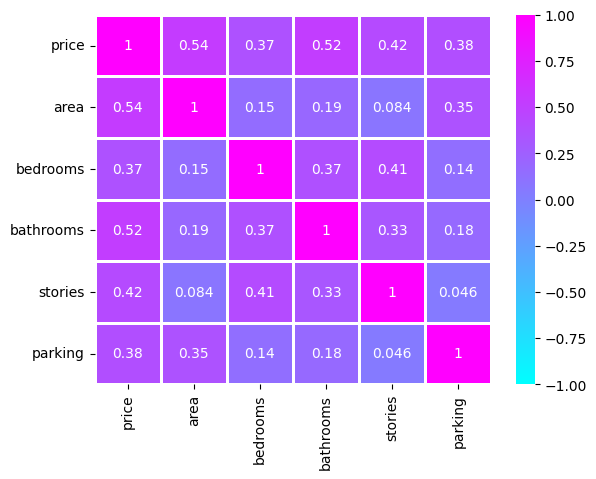

In [31]:
sns.heatmap(housing.corr(numeric_only=True),
            annot=True,
            vmin=-1,
            vmax=1,
            linewidths=1,
            cmap="cool"
           );

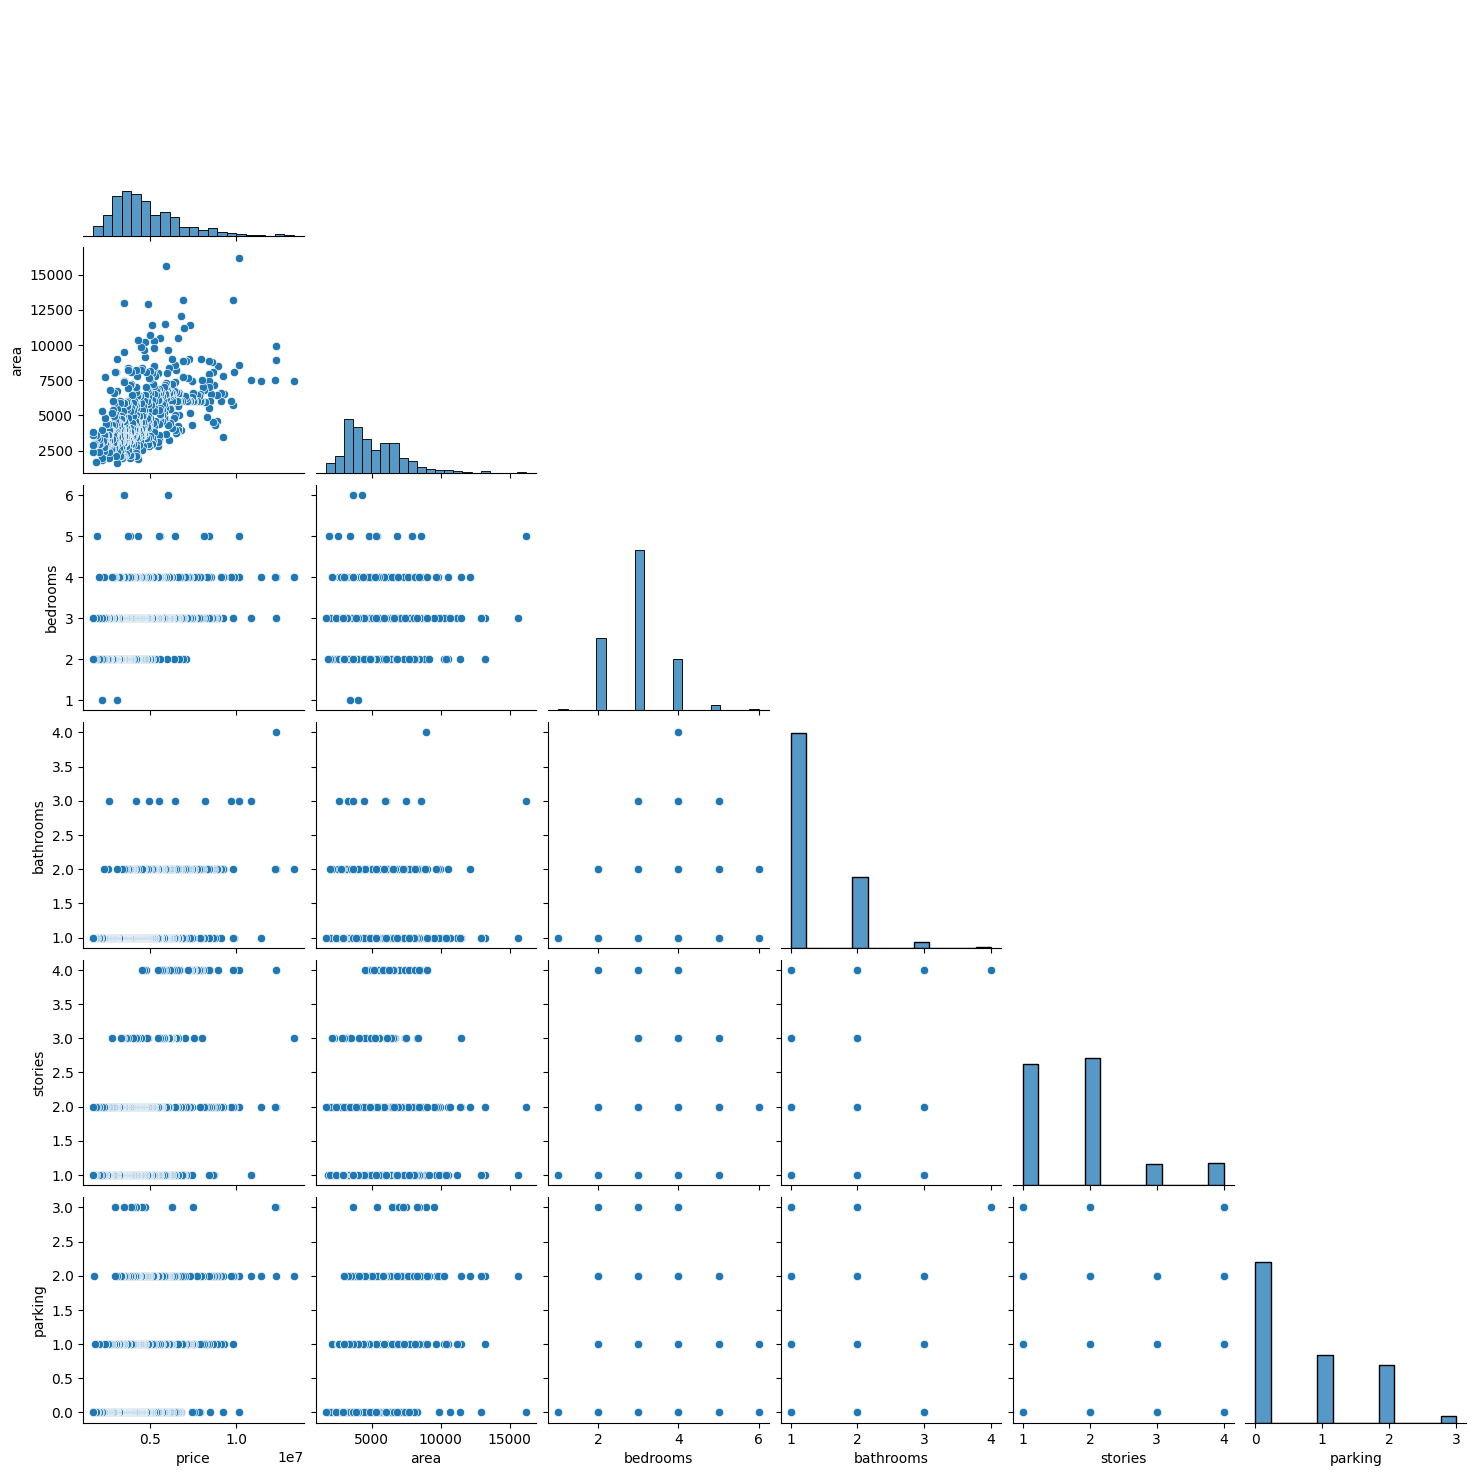

In [36]:
sns.pairplot(housing, corner=True);

# Model 1: Initial model with numeric variables only (no Data Engineering)

In [19]:
features = [
    'area', 
    'bedrooms', 
    'bathrooms', 
    'stories', 
    'parking'
        ]

X = sm.add_constant(housing[features])
y = housing.price

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [20]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     112.4
Date:                Tue, 07 May 2024   Prob (F-statistic):           9.06e-76
Time:                        11:35:28   Log-Likelihood:                -6739.0
No. Observations:                 436   AIC:                         1.349e+04
Df Residuals:                     430   BIC:                         1.351e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.775e+05   2.76e+05     -0.642      0.521   -7.21e+05    3.66e+05
area         318.7074     31.150     10.232      0.000     257.483     379.932
bedrooms    1.832e+05   9.31e+04      1.969      0.050     319.233    3.66e+05
bathrooms   1.153e+06   1.37e+05      8.393      0.000    8.83e+05    1.42e+06
stories      5.54e+05   7.73e+04      7.163      0.000    4.02e+05    7.06e+05
parking     4.102e+05   7.65e+04      5.365      0.000     2.6e+05    5.61e+05
==============================================================================
Omnibus:                       67.038   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.781
Skew:                           0.797   Prob(JB):                     2.45e-34
Kurtosis:                       5.446   Cond. No.                     2.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The model residuals plot shows some *trend*, some data engineering might be needed to improve model**

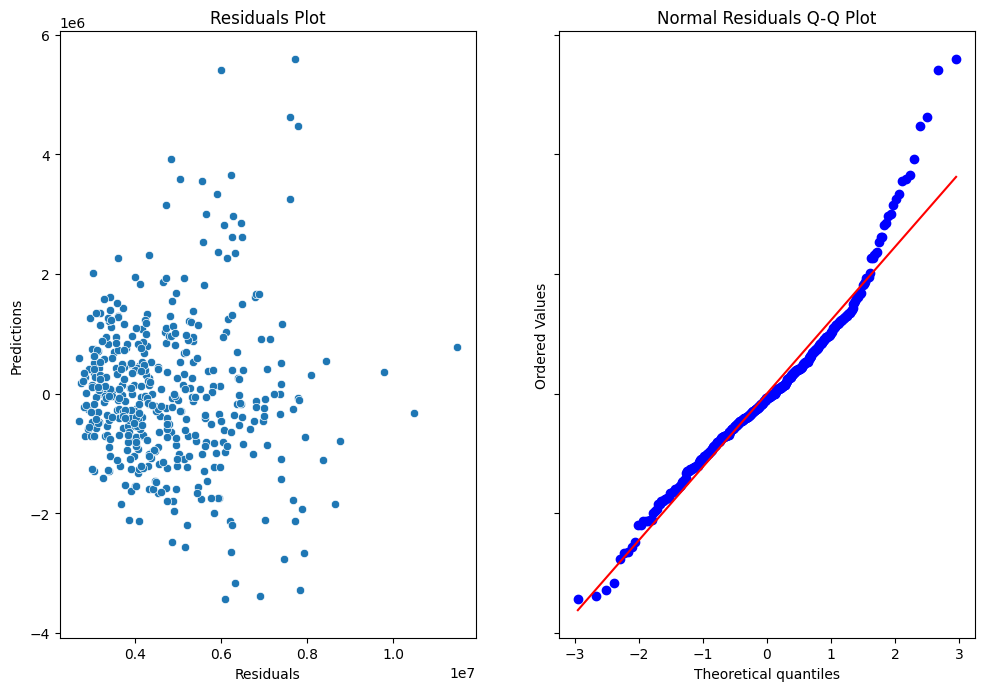

In [21]:
residual_plots_analysis(model)

# Data Engineering

## Category Column assessment

In [22]:
housing.select_dtypes("object").columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [23]:
housing_df = housing.copy()

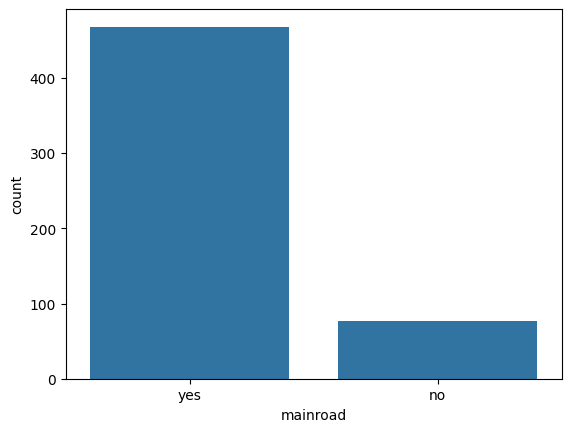

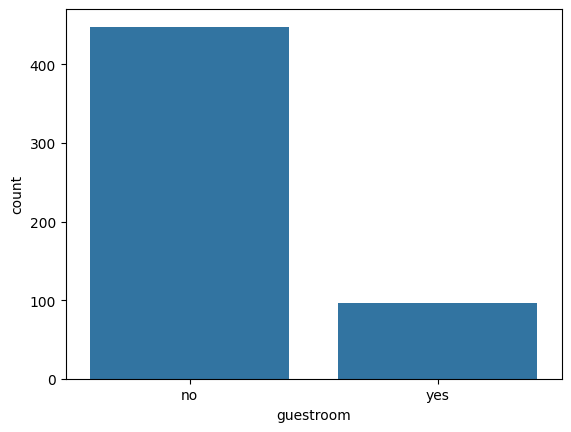

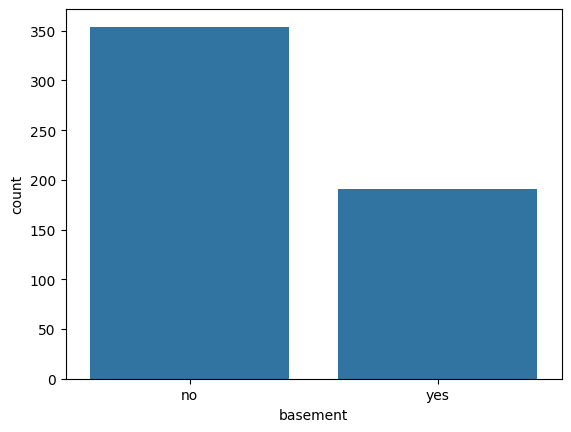

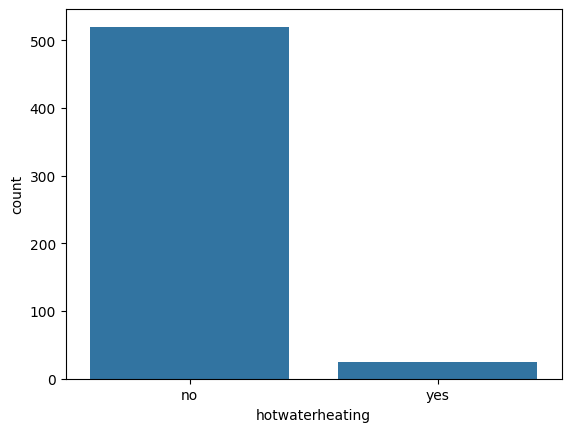

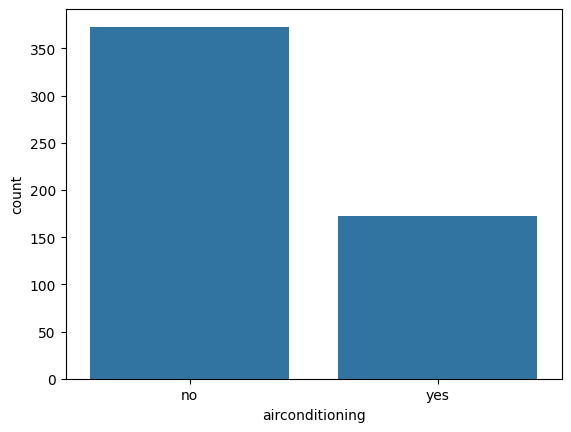

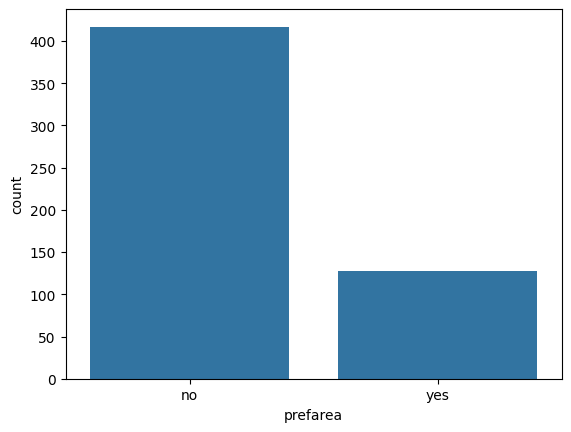

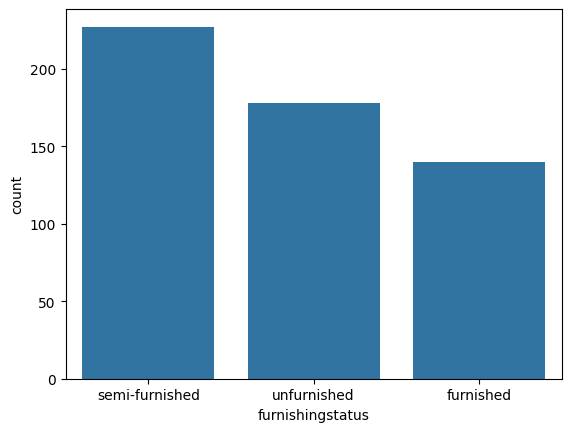

In [24]:
catagorical_value_counter(housing_df)

## Dummies Creation

In [25]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
housing_df = housing_df.assign(
    area_sq = housing_df.area ** 2
)

In [27]:
housing_df = pd.get_dummies(housing_df,dtype=int, drop_first=True)

In [28]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,parking,area_sq,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,55056400,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,80281600,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,99201600,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,56250000,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,55056400,1,1,1,0,1,0,0,0


# Model 2: The Final Model with data engineered columns included

In [29]:
X = sm.add_constant(housing_df.drop(["price"], axis =1))
# y = housing_df.price
y = np.log(housing_df.price)

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [23]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     72.80
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          6.19e-103
Time:                        20:48:56   Log-Likelihood:                 80.037
No. Observations:                 436   AIC:                            -130.1
Df Residuals:                     421   BIC:                            -68.91
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              14.2598      0.072    199.167      0.000      14.119      14.401
area                             9.561e-05   1.82e-05      5.251      0.000    5.98e-05       0.000
bedrooms                            0.0325      0.016      2.095      0.037       0.002       0.063
bathrooms                           0.1585      0.023      7.000      0.000       0.114       0.203
stories                             0.0910      0.014      6.639      0.000       0.064       0.118
parking                             0.0439      0.013      3.447      0.001       0.019       0.069
area_sq                         -3.481e-09   1.29e-09     -2.698      0.007   -6.02e-09   -9.45e-10
mainroad_yes                        0.0903      0.031      2.894      0.004       0.029       0.152
guestroom_yes                       0.0646      0.029      2.203      0.028       0.007       0.122
basement_yes                        0.0890      0.024      3.740      0.000       0.042       0.136
hotwaterheating_yes                 0.1561      0.053      2.938      0.003       0.052       0.260
airconditioning_yes                 0.1628      0.024      6.864      0.000       0.116       0.209
prefarea_yes                        0.1215      0.024      4.978      0.000       0.074       0.169
furnishingstatus_semi-furnished     0.0038      0.025      0.152      0.879      -0.045       0.053
furnishingstatus_unfurnished       -0.1222      0.027     -4.555      0.000      -0.175      -0.069
==============================================================================
Omnibus:                        3.216   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.099
Skew:                          -0.138   Prob(JB):                        0.212
Kurtosis:                       3.307   Cond. No.                     3.17e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**There are no obvious trends on the Residual Plot and the points plot close to the 45 degree line, thus model is acceptable**

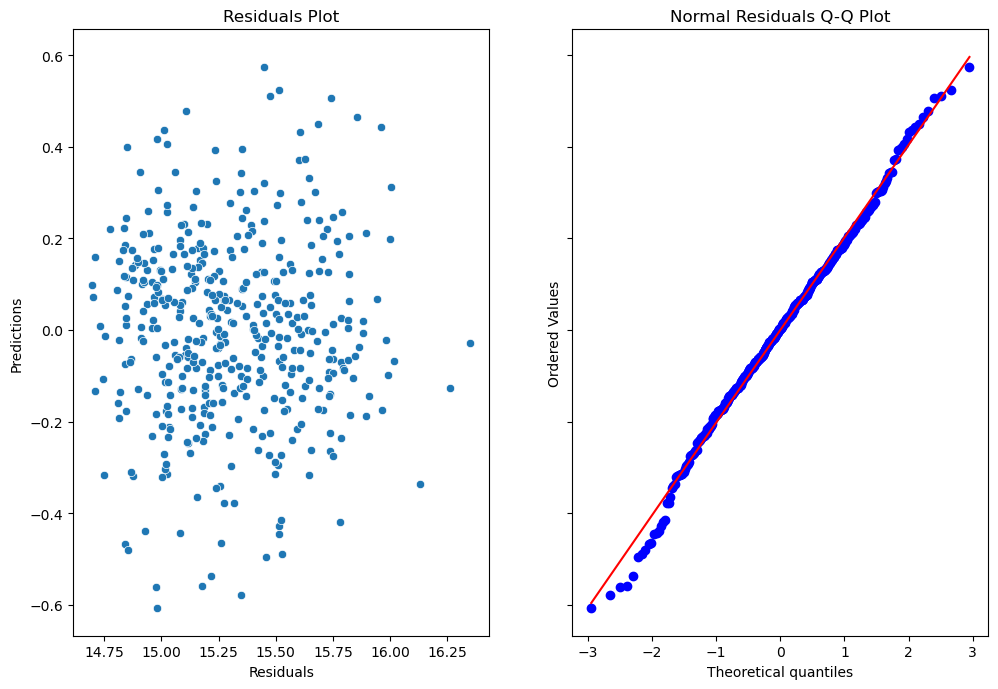

In [24]:
residual_plots_analysis(model)

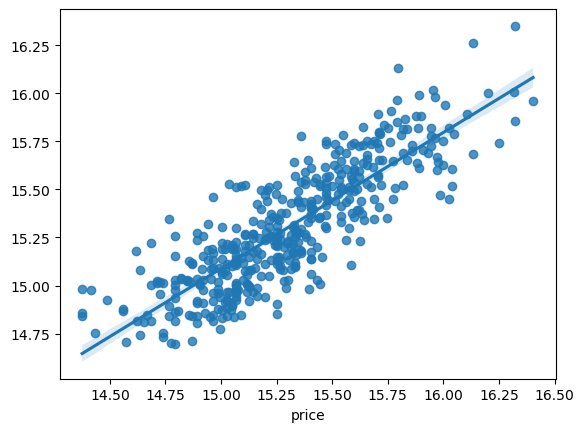

In [25]:
sns.regplot(x=y, y=model.predict(X),color=red);

# Outlier Influence

In [26]:
influence_df = model.get_influence().summary_frame()

In [27]:
influence_df.cooks_d.sort_values(ascending=False).round(3)

7      0.323
13     0.047
20     0.039
378    0.038
499    0.032
       ...  
210    0.000
94     0.000
287    0.000
200    0.000
104    0.000
Name: cooks_d, Length: 436, dtype: float64

**Anything above 0.5 to be checked. Anything above 1 causes issues**

In [28]:
housing.loc[[7,13,20]]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished


## Multi collinearity assessment

In [29]:
variables = sm.OLS(y, X).exog
pd.Series(
    [vif(variables, i) for i in range(variables.shape[1])],
    index=X.columns
)

const                              53.210340
area                               15.794275
bedrooms                            1.370955
bathrooms                           1.302927
stories                             1.497971
parking                             1.228900
area_sq                            14.604420
mainroad_yes                        1.200061
guestroom_yes                       1.258291
basement_yes                        1.317075
hotwaterheating_yes                 1.035476
airconditioning_yes                 1.262989
prefarea_yes                        1.137265
furnishingstatus_semi-furnished     1.555080
furnishingstatus_unfurnished        1.653738
dtype: float64

The constant can be ignored.

Anything less that 5 can be included in model

**area and area_sq are derived from each other that the high value is expected**

# Model Cross-validation

In [30]:
cross_validate_model(X, y)

All Valid R2s: [0.627, 0.731, 0.746, 0.658, 0.612]
Cross Valid R2: 0.675 +/- 0.054
All Valid MAE: [693375.526, 737014.349, 785501.12, 845696.259, 819802.085]
Cross Valid MAE: 776277.868 +/- 55159.335


# Test Dataset on the model

In [31]:
r2(y_test, model.predict(X_test)).round(3)

0.692

In [32]:
mae(np.exp(y_test), np.exp(model.predict(X_test))).round(3)

750691.729